
# Project: Investigating WeRateDogs Twitter Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling1">Gathering Data</a></li>
<li><a href="#wrangling2">Assessing Data</a></li>
<li><a href="#wrangling3">Cleaning and Storing Data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
# Introduction

<a id='wrangling1'></a>
## Gathering Data

In [1]:
# importing data and packages
import pandas as pd
import numpy as np
import os
import requests
import json
from io import BytesIO

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [4]:
df_t1 = pd.read_csv('twitter_archive_enhanced.csv')
df_t2 = pd.read_csv('image-predictions.tsv',sep = ('\t'))

In [5]:
tweet_lists = []
with open("tweet_json.txt",'r') as file:
    data = file.readlines()
    data = [json.loads(d) for d in data]

In [6]:
with open('reformatted_tweet.json','w') as file:
    json.dump(data,file)

In [7]:
df = pd.read_json('reformatted_tweet.json')
df_t3 = df[['id','retweet_count','favorite_count']]

<a id='wrangling2'></a>
## Assessing Data

In [8]:
df_t1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_t1[df_t1['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
341,8.322160e+17,NaN,NaN,2017-02-16 13:11:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.930000e+17,4.196984e+09,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
447,8.190150e+17,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sunny. She was also a v...,8.190000e+17,4.196984e+09,2017-01-11 02:21:57 +0000,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,None,None,None
1853,6.757070e+17,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1872,6.751470e+17,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
1895,6.747430e+17,6.750000e+17,4.196984e+09,2015-12-10 00:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Some clarification is required. The dog is sin...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1941,6.737160e+17,NaN,NaN,2015-12-07 04:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a heavily opinionated dog. Loves walls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673715861...,4,10,a,None,None,None,None
2260,6.675510e+17,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.680000e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None


In [11]:
df_t1[df_t1['in_reply_to_user_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,8.862670e+17,8.860000e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,8.816330e+17,8.820000e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,8.796740e+17,8.800000e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,8.707260e+17,8.710000e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,8.634280e+17,8.630000e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6.715500e+17,6.720000e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,6.696850e+17,6.690000e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,6.693530e+17,6.680000e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,6.689680e+17,6.690000e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [12]:
df_t1[df_t1['rating_numerator'] > 15].count()['tweet_id']

26

In [13]:
df_t1[df_t1['rating_denominator'] > 10].count()['tweet_id']

20

In [14]:
df_t2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [15]:
df_t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_t2[df_t2['p3_conf'] > 1].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [17]:
df_t3

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [18]:
df_t3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [23]:
df_t1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [24]:
df_t1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

#### Quality Issues
##### `df_t1` table
- Duplicated tweet_id  
- Wrong datatypes (tweet_id,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id)
- Some errors in numerator ratings and some denominators are not decimally rated
- Missing data; _NaN_ in (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls )

##### `df_t2` table
- tweet_id is not string
- Some lowercase prediction names (p1,p2,p3) 
- Non descriptive column headers

##### `df_t3` table
- tweet_id is not string

#### Tidiness Issues
- Dog-type variable in 4 four different columns in table df_t1 
- Table df_t3 which contains the retweet count and favorite count should be part of table df_t1(Enhanced Twitter Archive)

<a id='wrangling3'></a>
## Cleaning and Storing Data

In [46]:
df_t1_clean = df_t1.copy()
df_t2_clean = df_t2.copy()
df_t3_clean = df_t3.copy()

### Missing Data & Duplicated Data


#### Duplicated tweet_id in table `df_t1`

#### Define
Drop duplicated tweet_id

#### Code

In [47]:
mask = df_t1[df_t1['tweet_id'].duplicated()]
df_t1_clean = df_t1_clean.drop(mask.index)

#### Test

In [48]:
df_t1_clean[df_t1_clean['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `df_t1`Missing data; NaN in in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp and expanded_urls

#### Define
Fill null values for `in_reply_to_status_id` and `in_reply_to_user_id` colums with "not available"

Fill null values for `retweeted_status_user_id`,`retweeted_status_user_id` and `retweeted_status_timestamp` with "not available"

Fill null values for `expanded_urls`,with "missing". 

#### Code

In [49]:
df_t1_clean['in_reply_to_status_id'].fillna('not available',inplace=True)
df_t1_clean['in_reply_to_user_id'].fillna('not available',inplace=True)
df_t1_clean['retweeted_status_id'].fillna('not available',inplace=True)
df_t1_clean['retweeted_status_user_id'].fillna('not available',inplace=True)
df_t1_clean['retweeted_status_timestamp'].fillna('not available',inplace=True)
df_t1_clean['expanded_urls'].fillna('missing',inplace=True)

#### Test

In [50]:
df_t1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2349 non-null   float64
 1   in_reply_to_status_id       2349 non-null   object 
 2   in_reply_to_user_id         2349 non-null   object 
 3   timestamp                   2349 non-null   object 
 4   source                      2349 non-null   object 
 5   text                        2349 non-null   object 
 6   retweeted_status_id         2349 non-null   object 
 7   retweeted_status_user_id    2349 non-null   object 
 8   retweeted_status_timestamp  2349 non-null   object 
 9   expanded_urls               2349 non-null   object 
 10  rating_numerator            2349 non-null   int64  
 11  rating_denominator          2349 non-null   int64  
 12  name                        2349 non-null   object 
 13  doggo                       2349 

### Tidiness

#### Dog-type variable in 4 different columns in table `df_t1`

#### Define
Melt _doggo,floofer,pupper_ and _puppo_ columns as 'growth_stage' and check for duplicated tweet_id as a result of multiple dog stage entry in rows and drop them. Then create dataframe where all 4 growth_stage are 'None', then join together as one.

#### Code

In [51]:
df_t1_clean1 = pd.melt(df_t1_clean,id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name'],
                     var_name='growth_stage',value_name='stage')
df_t1_clean1 = df_t1_clean1[(df_t1_clean1.stage !='None')]
df_t1_clean1.drop(['stage'], axis = 1,inplace=True)
mask = df_t1_clean1[df_t1_clean1['tweet_id'].duplicated()]
df_t1_clean1 = df_t1_clean1.drop(mask.index)
df_t1_clean2 = df_t1_clean[(df_t1_clean.doggo == 'None') & (df_t1_clean.floofer =='None') & (df_t1_clean.pupper == 'None') & (df_t1_clean.puppo =='None')]
df_t1_clean2.drop( columns=['doggo','floofer','pupper','puppo'],inplace=True)


t1_dup = mask
t1_dup.drop(columns=[
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name'],inplace=True)
t1_dup.rename(columns={'growth_stage':'growth_stage_dup'},inplace=True)


df_t1_clean1 = pd.merge(df_t1_clean1,t1_dup,on='tweet_id',how='left')
df_t1_clean1['growth_stage_dup'].fillna('',inplace=True)


C:\Users\Toluwalase\AppData\Local\Temp\ipykernel_9172\2251037831.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t1_clean2.drop( columns=['doggo','floofer','pupper','puppo'],inplace=True)


In [52]:
#Concatenate both dog stage columns
df_t1_clean1['dog_stage'] = df_t1_clean1['growth_stage'].map(str)  + ' ' + df_t1_clean1['growth_stage_dup'].map(str)

df_t1_clean1.drop(columns=['growth_stage','growth_stage_dup'],inplace=True)

In [53]:
#create dog_stage array for df_t1_clean2 and concat 
growth_stages = np.repeat('None',df_t1_clean2.shape[0])
df_t1_clean2['dog_stage'] = growth_stages
df_t1_clean = pd.concat([df_t1_clean1,df_t1_clean2])

C:\Users\Toluwalase\AppData\Local\Temp\ipykernel_9172\3396594588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t1_clean2['dog_stage'] = growth_stages


#### Test

In [54]:
df_t1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,8.902400e+17,not available,not available,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,not available,not available,not available,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
1,8.841630e+17,not available,not available,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,not available,not available,not available,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
2,8.729670e+17,not available,not available,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,not available,not available,not available,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo
3,8.715160e+17,not available,not available,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,not available,not available,not available,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
4,8.711030e+17,not available,not available,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,not available,not available,not available,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo


#### Table df_t3 which contains the retweet count and favorite count should be part of table df_t1(Enhanced Twitter Archive)

#### Define
To clean this, the tweet_id will be retrieved as string from expanded_urls columns using regular expression.Then Merge Table`df_t3_clean` with Table `df_t1_clean`. 

#### Code

In [55]:
df_t1_clean['tweet_ID'] = df_t1_clean.expanded_urls.str.extract('(\\d+)',expand=True)

In [56]:
df_t1_clean['tweet_id']=df_t1_clean['tweet_ID']
df_t1_clean.drop('tweet_ID', axis = 1, inplace = True)

In [57]:
df_t3_clean.rename(columns={'id':'tweet_id'}, inplace=True)
# convert df_t3_clean tweet_id to string
df_t3_clean['tweet_id'] = df_t3_clean['tweet_id'].astype(str)

In [58]:
df_t1_clean = pd.merge(df_t1_clean,df_t3_clean,on='tweet_id')

#### Test

In [59]:
df_t1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2122 entries, 0 to 2121
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2122 non-null   object
 1   in_reply_to_status_id       2122 non-null   object
 2   in_reply_to_user_id         2122 non-null   object
 3   timestamp                   2122 non-null   object
 4   source                      2122 non-null   object
 5   text                        2122 non-null   object
 6   retweeted_status_id         2122 non-null   object
 7   retweeted_status_user_id    2122 non-null   object
 8   retweeted_status_timestamp  2122 non-null   object
 9   expanded_urls               2122 non-null   object
 10  rating_numerator            2122 non-null   int64 
 11  rating_denominator          2122 non-null   int64 
 12  name                        2122 non-null   object
 13  dog_stage                   2122 non-null   obje

In [60]:
df_t1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,890240255349198849,not available,not available,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,not available,not available,not available,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467
1,884162670584377345,not available,not available,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,not available,not available,not available,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,3128,20771
2,872967104147763200,not available,not available,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,not available,not available,not available,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,5669,28031
3,871515927908634625,not available,not available,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,not available,not available,not available,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,3628,20730
4,869596645499047938,not available,not available,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,not available,not available,not available,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,3327,16476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,666049248165822465,not available,not available,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,not available,not available,not available,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,41,111
2118,666044226329800704,not available,not available,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,not available,not available,not available,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,147,311
2119,666033412701032449,not available,not available,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,not available,not available,not available,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,47,128
2120,666029285002620928,not available,not available,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,not available,not available,not available,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,48,132


### Quality 

#### Some errors in ratings and some denominators are not decimally rated

#### Define
Any denominator rating less than 20 should be equated to 10. Then a column of ratio(numerator/denominator) will ve generated, dropping any value greater than 1.5.  

#### Code

In [64]:
df_t1_clean[df_t1_clean['rating_denominator'] < 20].rating_denominator = 10


df_t1_clean['rating'] = df_t1_clean['rating_numerator'].map(float) / df_t1_clean['rating_denominator'].map(float)
mask = df_t1_clean[df_t1_clean['rating'] > 1.5]


df_t1_clean.drop(mask.index,inplace=True)

C:\Users\Toluwalase\AppData\Local\Temp\ipykernel_9172\3041032024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t1_clean[df_t1_clean['rating_denominator'] < 20].rating_denominator = 10


#### Test

In [69]:
df_t1_clean[df_t1_clean['rating'] > 1.5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,rating


####  Table df_t2_clean tweet_id is not string, Some lowercase prediction names (p1,p2,p3) and Non descriptive column headers

#### Define
Convert tweet_id to string, make column headers descriptive and make all predictions in Title Case

#### Code

In [70]:
df_t2_clean['tweet_id'] = df_t2_clean['tweet_id'].astype(str)

df_t2_clean.rename(columns={'p1':'prediction1','p1_conf':'prediction1_confidence','p1_dog':'prediction1_dog','p2':'prediction2',
 'p2_conf':'prediction2_confidence','p2_dog':'prediction2_dog','p3':'prediction3','p3_conf':'prediction3_confidence','p3_dog':'prediction3_dog'}, inplace=True)


In [71]:
#converting to Title Case
df_t2_clean.prediction1 = df_t2_clean.prediction1.str.title()
df_t2_clean.prediction2 = df_t2_clean.prediction2.str.title()
df_t2_clean.prediction3 = df_t2_clean.prediction3.str.title()

#### Test

In [72]:
df_t2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   object 
 1   jpg_url                 2075 non-null   object 
 2   img_num                 2075 non-null   int64  
 3   prediction1             2075 non-null   object 
 4   prediction1_confidence  2075 non-null   float64
 5   prediction1_dog         2075 non-null   bool   
 6   prediction2             2075 non-null   object 
 7   prediction2_confidence  2075 non-null   float64
 8   prediction2_dog         2075 non-null   bool   
 9   prediction3             2075 non-null   object 
 10  prediction3_confidence  2075 non-null   float64
 11  prediction3_dog         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [73]:
df_t2_clean.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Rename Updated tables

In [79]:
df_tweet = df_t1_clean
df_prediction = df_t2_clean

In [80]:
df_prediction

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


### Storing into 1 data set

In [81]:
twitter_archive_master = pd.merge(df_tweet,df_prediction,on='tweet_id')

In [82]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

In [83]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,890240255349198849,not available,not available,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,not available,not available,not available,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,884162670584377345,not available,not available,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,not available,not available,not available,https://twitter.com/dog_rates/status/884162670...,...,1,German_Shepherd,0.707046,True,Malinois,0.199396,True,Norwegian_Elkhound,0.049148,True
2,872967104147763200,not available,not available,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,not available,not available,not available,https://twitter.com/dog_rates/status/872967104...,...,2,Labrador_Retriever,0.476913,True,Chesapeake_Bay_Retriever,0.174145,True,German_Short-Haired_Pointer,0.092861,True
3,871515927908634625,not available,not available,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,not available,not available,not available,https://twitter.com/dog_rates/status/871515927...,...,2,Komondor,0.974781,True,Briard,0.020041,True,Swab,0.003228,False
4,869596645499047938,not available,not available,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,not available,not available,not available,https://twitter.com/dog_rates/status/869596645...,...,1,Chihuahua,0.955156,True,Toy_Terrier,0.008054,True,Muzzle,0.006296,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,666049248165822465,not available,not available,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,not available,not available,not available,https://twitter.com/dog_rates/status/666049248...,...,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2111,666044226329800704,not available,not available,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,not available,not available,not available,https://twitter.com/dog_rates/status/666044226...,...,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
2112,666033412701032449,not available,not available,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,not available,not available,not available,https://twitter.com/dog_rates/status/666033412...,...,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
2113,666029285002620928,not available,not available,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,not available,not available,not available,https://twitter.com/dog_rates/status/666029285...,...,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True


<a id='eda'></a>
### Exploratory Data Analysis

**Explore data to know if dogs with higher rating had the greatest retweet and favorite count**

The dogs will be categorized into three levels, 
- dogs rated above 10 (Top_rated)
- dogs rated between 6 and 10(Mid_rated)
- dogs rated less than or equal to 5 (Low_rated) 

In [89]:
top_rated = df_tweet.query('rating > 1')
mid_rated = df_tweet.query('0.5 < rating <=1')
low_rated = df_tweet.query('0 <= rating <=0.5')

In [90]:
#confirming sample counts equals sum of category counts
num_samples =  df_tweet.shape[0]
num_samples ==top_rated['rating'].count() + mid_rated['rating'].count() + low_rated['rating'].count() 

True

In [91]:
#calculating average retweet counts
top_rated_retweet = top_rated['retweet_count'].mean()
mid_rated_retweet = mid_rated['retweet_count'].mean()
low_rated_retweet = low_rated['retweet_count'].mean() 
print("Rating : Average Retweet")
print("TOP: ",top_rated_retweet," MID: ",mid_rated_retweet," LOW: ",low_rated_retweet)

Rating : Average Retweet
TOP:  4373.310262529833  MID:  1462.8242894056848  LOW:  1351.4761904761904


#### Representing Result with a Bar Chart

Text(0, 0.5, 'Average Tweet Counts')

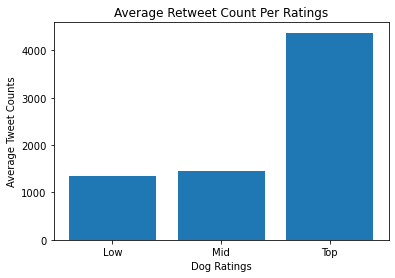

In [92]:
#creating bar chart
locations = [1,2,3]
heights = [low_rated_retweet,mid_rated_retweet,top_rated_retweet]
labels = ['Low', 'Mid', 'Top']
plt.bar(locations,heights, tick_label = labels)
plt.title('Average Retweet Count Per Ratings')
plt.xlabel('Dog Ratings')
plt.ylabel('Average Tweet Counts')

**From the results shown above, it can be shown that the Top ratings i.e those above 10 had the greatest retweets with an average retweet count of about 4373. This may suggest that the model for ratings may be customer-centric. Customers will only retweets what they love, and this is somewhat indicative by the ratings.**

In [93]:
#calculating average retweet counts
top_rated_favorite = top_rated['favorite_count'].mean()
mid_rated_favorite = mid_rated['favorite_count'].mean()
low_rated_favorite = low_rated['favorite_count'].mean() 
print("Rating : Average Favorite Count")
print("TOP: ",top_rated_favorite," MID: ",mid_rated_favorite," LOW: ",low_rated_favorite)

Rating : Average Favorite Count
TOP:  14039.536197295147  MID:  3904.222222222222  LOW:  3671.0476190476193


#### Representing Result with a Bar Chart

Text(0, 0.5, 'Average Favorite Counts')

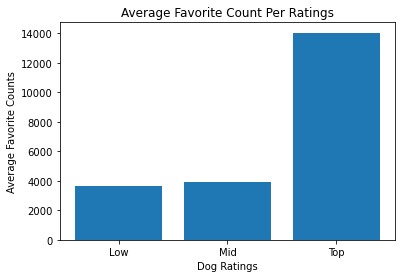

In [94]:
#creating bar chart
locations = [1,2,3]
heights = [low_rated_favorite,mid_rated_favorite,top_rated_favorite]
labels = ['Low', 'Mid', 'Top']
plt.bar(locations,heights, tick_label = labels)
plt.title('Average Favorite Count Per Ratings')
plt.xlabel('Dog Ratings')
plt.ylabel('Average Favorite Counts')

**The result above also shows that the high rated dogs were the most favorited by the customers. This also indicative that the scoring model is somewhat authentic seeing that the customers favorites these high rated dogs**

#### Likeliness to retweet or favorite a post

**It is also seen that the average retweet per dog rating category is higher than the average  favorite counts. This may show customers likeliness to retweet a post they love rather than favoriting by a click.**

### Explore Extent of Model Accuracy| Consistency
The consistency of the model is assessed by checking the exactness of the model to predict a True or a False over a set of runs.

In [95]:
total_Prediction = df_prediction.shape[0]
consistent_result = df_prediction[(df_prediction.prediction1_dog==df_prediction.prediction2_dog) & (df_prediction.prediction2_dog==df_prediction.prediction3_dog)].shape[0]
inconsistent_result = total_Prediction - consistent_result
consistency = (consistent_result/total_Prediction)*100
consistency = round(consistency,2)
print ('The Model is ',consistency,'% consistent')

The Model is  75.52 % consistent


**The neural network used for the prediction of the image of the dog is 75.52% consistent in its prediction.**

<a id='conclusions'></a>
## Conclusions


**This report shows the data wrangling process done for WeRateDogs_Twitter_Data_project. The three levels of data wrangling has been explored. The data gathering process included manual and programmatic downloading, as well as API data query. The Data was also assessed visually and programmatically. And finally cleaned for Exploratory Data Analysis. A summary of the EDA shows that high rated dogs had the greatest average retweets and favorite counts. Also customers tend to retweet a loved post more than clicking a favorite. The EDA suggests a 76% reliability of the model for image prediction as a function of consistency.**